# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import scipy
import statistics
import matplotlib.pyplot as plt

from scipy.stats import bootstrap

# USING PANDAS TO IMPORT SWITCH SCANNER METRICS

In [2]:
# Defining the pathway to the switch scanner metrics.
path_switchscan_metrics_updatedmodels = '../SourceData/Performance_ModelUpdates.xlsx'
path_switchscan_metrics_originalmodel = '../SourceData/Performance_OriginalModel_Simulation.xlsx'

# Show maximum columns
pd.set_option('display.max_columns', None)

# Importing the excel sheets for 4-vote thresholds
df_4thr_updatedmodels = pd.read_excel(path_switchscan_metrics_updatedmodels, '4_votes')
df_4thr_originalmodel = pd.read_excel(path_switchscan_metrics_originalmodel, '4_votes')

# Extracting only the summary rows for each day.
df_4thr_summary_updatedmodels = df_4thr_updatedmodels.loc[df_4thr_updatedmodels['Date'].str.contains('Total'),:]
df_4thr_summary_originalmodel = df_4thr_originalmodel.loc[df_4thr_originalmodel['Date'].str.contains('Total'),:]

# Remove the "_Total" suffix from each date.
df_4thr_summary_updatedmodels['Date'] = df_4thr_summary_updatedmodels['Date'].str.replace('_Total', '')
df_4thr_summary_originalmodel['Date'] = df_4thr_summary_originalmodel['Date'].str.replace('_Total', '')


/tmp/ipykernel_1012532/978500270.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4thr_summary_updatedmodels['Date'] = df_4thr_summary_updatedmodels['Date'].str.replace('_Total', '')
/tmp/ipykernel_1012532/978500270.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4thr_summary_originalmodel['Date'] = df_4thr_summary_originalmodel['Date'].str.replace('_Total', '')


# REORGANIZING SUMMARY METRICS INTO DICTIONARIES

In [3]:

# Extracting the dates from each dataframe.
dates_4thr = df_4thr_summary_updatedmodels['Date'].tolist()

# Initializing the dictionaries for the summary metrics for the updated models and original model.
summary_stats_4thr_updatedmodels = {}
summary_stats_4thr_originalmodel = {}

# Iterating across all dates using the 4-vote threshold from the updated models.
for date in dates_4thr:
        
    # Extracting the sub-dataframe for the current date.
    this_date_df = df_4thr_summary_updatedmodels.loc[df_4thr_summary_updatedmodels['Date'] == date]       
        
    # Initializing and populating the dictionary for the current date.
    this_date_dict = {}
    this_date_dict['sensitivity_mean']   = this_date_df['Sensitivity (%)']
    this_date_dict['days_post_training'] = this_date_df['Days Post-Training']
    this_date_dict['fpf_hr']             = this_date_df['FPF ( /hr)']
    this_date_dict['fpf_min']            = this_date_df['FPF ( /min)']
    this_date_dict['n_detections']       = this_date_df['N Detections']
    this_date_dict['n_grasps']           = this_date_df['N Grasps']
    this_date_dict['total_time']         = this_date_df['Block Time (s)']
    this_date_dict['tpf_hr']             = this_date_df['TPF ( /hr)']
    this_date_dict['tpf_min']            = this_date_df['TPF ( /min)']
    
    # Populating the Summary Stats dictionary with the current date's information.
    summary_stats_4thr_updatedmodels[date] = this_date_dict
    
    
# Iterating across all dates using the 4-vote threshold from the original model.
for date in dates_4thr:
        
    # Extracting the sub-dataframe for the current date.
    this_date_df = df_4thr_summary_originalmodel.loc[df_4thr_summary_originalmodel['Date'] == date]       
        
    # Initializing and populating the dictionary for the current date.
    this_date_dict = {}
    this_date_dict['sensitivity_mean']   = this_date_df['Sensitivity (%)']
    this_date_dict['days_post_training'] = this_date_df['Days Post-Training']
    this_date_dict['fpf_hr']             = this_date_df['FPF ( /hr)']
    this_date_dict['fpf_min']            = this_date_df['FPF ( /min)']
    this_date_dict['n_detections']       = this_date_df['N Detections']
    this_date_dict['n_grasps']           = this_date_df['N Grasps']
    this_date_dict['total_time']         = this_date_df['Block Time (s)']
    this_date_dict['tpf_hr']             = this_date_df['TPF ( /hr)']
    this_date_dict['tpf_min']            = this_date_df['TPF ( /min)']
    
    # Populating the Summary Stats dictionary with the current date's information.
    summary_stats_4thr_originalmodel[date] = this_date_dict


TPR 4-vote updated model: 
[99.046 98.858 99.065 98.983 97.842 99.079 99.155 99.419]


TPR 4-vote original model: 
[97.71  94.29  95.794 98.983 97.302 90.424 97.297 87.597]


Median Sensitivity (Updated Models):  99.0555
Median Sensitivity (Original Model):  96.5455
Median TPF (Updated Models):  11.711
Median TPF (Original Model):  11.578
Median FPF (Updated Models):  0.6405
Median FPF (Original Model):  0.1565


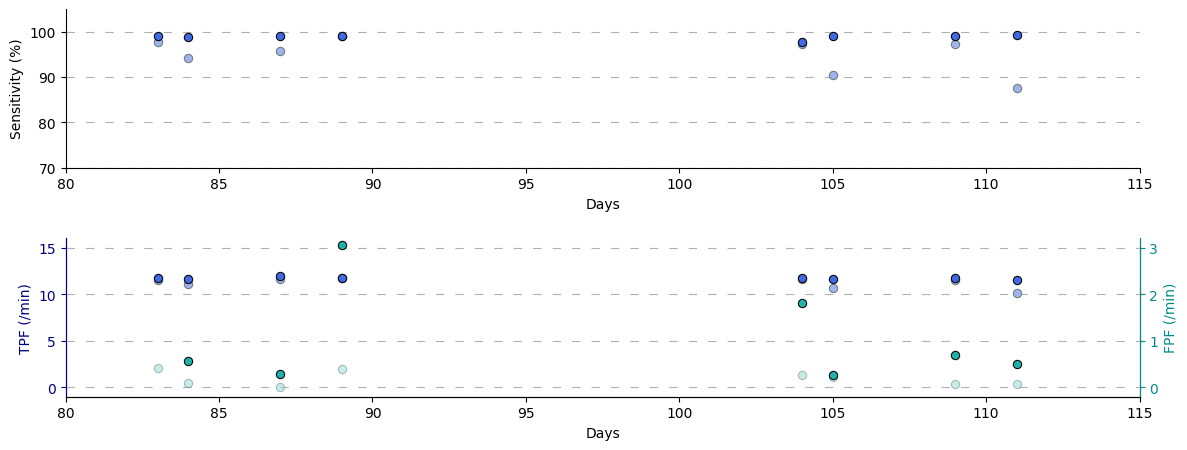

In [4]:

# EXPERIMNETER INPUTS:
color1a    = 'navy' 
color1b    = 'royalblue'
color2a    = 'darkcyan' 
color2b    = 'lightseagreen' 
marker1    = 'o'
marker2    = '^'
save_figs  = False

# Extracting the Sensitivity, TPF, and FPF.
days_post_training_4thr        = np.asarray(df_4thr_summary_updatedmodels['Days Post-Training']).astype(float)
tpf_4thr_updatedmodels         = np.round(np.asarray(df_4thr_summary_updatedmodels['TPF ( /min)']).astype(float),3)
fpf_4thr_updatedmodels         = np.round(np.asarray(df_4thr_summary_updatedmodels['FPF ( /min)']).astype(float),3)
sensitivity_4thr_updatedmodels = np.round(np.asarray(df_4thr_summary_updatedmodels['Sensitivity (%)']).astype(float),3)
tpf_4thr_originalmodel         = np.round(np.asarray(df_4thr_summary_originalmodel['TPF ( /min)']).astype(float),3)
fpf_4thr_originalmodel         = np.round(np.asarray(df_4thr_summary_originalmodel['FPF ( /min)']).astype(float),3)
sensitivity_4thr_originalmodel = np.round(np.asarray(df_4thr_summary_originalmodel['Sensitivity (%)']).astype(float), 3)

print('TPR 4-vote updated model: ')
print(sensitivity_4thr_updatedmodels)
print('\n')

print('TPR 4-vote original model: ')
print(sensitivity_4thr_originalmodel)
print('\n')


# PLOTTING
fig, ax = plt.subplots(2,1, figsize=(12,5))
fig.tight_layout(pad=3)

# ROW 1: SENSITIVITY
ax[0].scatter(days_post_training_4thr, sensitivity_4thr_originalmodel,\
              color = (159/255, 179/255, 238/255),\
              edgecolors=(107/255, 123/255, 120/255),\
              linewidths=0.75,\
              marker=marker1,\
              zorder=2)
ax[0].scatter(days_post_training_4thr, sensitivity_4thr_updatedmodels,\
              color = color1b,\
              edgecolors='black',\
              linewidths=0.75,\
              marker=marker1,\
              zorder=2)
ax[0].set_yticks(np.arange(70,101,10)) 
ax[0].set_ylim([70, 105])
ax[0].set_ylabel('Sensitivity (%)')
ax[0].spines[['right', 'top']].set_visible(False)
ax[0].yaxis.label.set_color('k') 
ax[0].tick_params(axis='y', colors='k')
ax[0].spines['left'].set_color('k') 
ax[0].set_xlabel('Days')
ax[0].set_xlim([80,115])
ax[0].grid(axis='y', linestyle = '--', dashes=(7.5, 10))
print('Median Sensitivity (Updated Models): ', statistics.median(sensitivity_4thr_updatedmodels))
print('Median Sensitivity (Original Model): ', statistics.median(sensitivity_4thr_originalmodel))

# ROW 2: TPF
ax[1].scatter(days_post_training_4thr, tpf_4thr_originalmodel,
              color = (159/255, 179/255, 238/255),\
              edgecolors=(107/255, 123/255, 120/255),\
              linewidths=0.75,\
              marker=marker1,\
              zorder=2)
ax[1].scatter(days_post_training_4thr, tpf_4thr_updatedmodels,\
              color = color1b,\
              edgecolors='black',\
              linewidths=0.75,\
              marker=marker1, zorder=2)
ax[1].set_ylabel('TPF (/min)')
ax[1].set_yticks(np.arange(0,16,5)) 
ax[1].set_ylim([-1, 16])
ax[1].yaxis.label.set_color(color1a) 
ax[1].tick_params(axis='y', colors=color1a)
ax[1].spines[['top']].set_visible(False)
ax[1].set_xlim([80,115])
ax[1].set_xlabel('Days')
ax[1].grid(axis='y', linestyle='--', dashes=(7.5, 10))

ax1a = ax[1].twinx()  
ax1a.scatter(days_post_training_4thr, fpf_4thr_originalmodel,\
             color = (141/255, 218/255, 212/255),\
             edgecolors=(107/255, 123/255, 120/255),\
             linewidths=0.75,\
             marker=marker1,\
             zorder=2,\
             alpha = 0.5)
ax1a.scatter(days_post_training_4thr, fpf_4thr_updatedmodels,\
             color = color2b,\
             edgecolors='black',\
             linewidths=0.75,\
             marker=marker1,\
             zorder=2)
ax1a.set_ylabel('FPF (/min)')
ax1a.set_yticks(np.array([0,1,2,3])) 
ax1a.set_ylim([-0.2, 3.2])
ax1a.spines['right'].set_color(color2a) 
ax1a.spines['left'].set_color(color1a) 
ax1a.yaxis.label.set_color(color2a) 
ax1a.tick_params(axis='y', colors=color2a)
ax1a.spines[['top']].set_visible(False)

print('Median TPF (Updated Models): ', statistics.median(tpf_4thr_updatedmodels))
print('Median TPF (Original Model): ', statistics.median(tpf_4thr_originalmodel))
print('Median FPF (Updated Models): ', statistics.median(fpf_4thr_updatedmodels))
print('Median FPF (Original Model): ', statistics.median(fpf_4thr_originalmodel))

if save_figs:
    fig.savefig('PerformanceUpdatedModels.jpg', bbox_inches = 'tight', dpi=1000)
    fig.savefig('PerformanceUpdatedModels.svg', format = 'svg', bbox_inches='tight', dpi = 2000)



# T-test for Performance from Updated Decoders vs. Original Decoders

In [5]:

print('Wilcoxon Rank-Sum (Sensitivity):', scipy.stats.ranksums(sensitivity_4thr_updatedmodels, sensitivity_4thr_originalmodel))
print('Wilcoxon Rank-Sum (TPF):', scipy.stats.ranksums(tpf_4thr_updatedmodels, tpf_4thr_originalmodel))
print('Wilcoxon Rank-Sum (FPF):', scipy.stats.ranksums(fpf_4thr_updatedmodels, fpf_4thr_originalmodel))


Wilcoxon Rank-Sum (Sensitivity): RanksumsResult(statistic=3.0981196859119717, pvalue=0.0019475275859466652)
Wilcoxon Rank-Sum (TPF): RanksumsResult(statistic=2.4679936480993674, pvalue=0.01358727306399339)
Wilcoxon Rank-Sum (FPF): RanksumsResult(statistic=2.9405881764588204, pvalue=0.003275897482908591)


# 95% Confidence Interval of the Median for Performance Metrics

In [6]:

n_resamples = 10000

ci_95_tpr_4thr_updatedmodels = bootstrap((sensitivity_4thr_updatedmodels,), np.mean, confidence_level=0.95, n_resamples=n_resamples).confidence_interval
ci_95_tpr_4thr_originalmodel = bootstrap((sensitivity_4thr_originalmodel,), np.mean, confidence_level=0.95, n_resamples=n_resamples).confidence_interval
ci_95_tpf_4thr_updatedmodels = bootstrap((tpf_4thr_updatedmodels,), np.mean, confidence_level=0.95, n_resamples=n_resamples).confidence_interval
ci_95_tpf_4thr_originalmodel = bootstrap((tpf_4thr_originalmodel,), np.mean, confidence_level=0.95, n_resamples=n_resamples).confidence_interval
ci_95_fpf_4thr_updatedmodels = bootstrap((fpf_4thr_updatedmodels,), np.mean, confidence_level=0.95, n_resamples=n_resamples).confidence_interval
ci_95_fpf_4thr_originalmodel = bootstrap((fpf_4thr_originalmodel,), np.mean, confidence_level=0.95, n_resamples=n_resamples).confidence_interval

print('95% CI Sensitivity (Updated models): ', ci_95_tpr_4thr_updatedmodels)
print('95% CI Sensitivity (Original models): ', ci_95_tpr_4thr_originalmodel)
print('95% CI TPF (Updated models): ', ci_95_tpf_4thr_updatedmodels)
print('95% CI TPF (Original models): ', ci_95_tpf_4thr_originalmodel)
print('95% CI FPF (Updated models): ', ci_95_fpf_4thr_updatedmodels)
print('95% CI FPF (Original models): ', ci_95_fpf_4thr_originalmodel)


95% CI Sensitivity (Updated models):  ConfidenceInterval(low=98.4290300271072, high=99.131625)
95% CI Sensitivity (Original models):  ConfidenceInterval(low=91.61428485120601, high=97.04295673824129)
95% CI TPF (Updated models):  ConfidenceInterval(low=11.664250000000001, high=11.840842821780317)
95% CI TPF (Original models):  ConfidenceInterval(low=10.77905461718164, high=11.54725)
95% CI FPF (Updated models):  ConfidenceInterval(low=0.7916249999999999, high=6.7892896591973235)
95% CI FPF (Original models):  ConfidenceInterval(low=0.099125, high=0.30125)
